In [1]:
import pandas as pd

file_path = 'Aggregated_Cleaned_Merged_Dataset.csv'
data = pd.read_csv(file_path)

data['State.Minimum.Wage'] = data.apply(
    lambda row: row['Federal.Minimum.Wage'] if row['State.Minimum.Wage'] == 0 else row['State.Minimum.Wage'], axis=1
)

remaining_zero_min_wage = data[data['State.Minimum.Wage'] == 0]

print(remaining_zero_min_wage)


Empty DataFrame
Columns: [Year, State, State.Minimum.Wage, State.Minimum.Wage.2020.Dollars, Federal.Minimum.Wage, Federal.Minimum.Wage.2020.Dollars, Effective.Minimum.Wage, Effective.Minimum.Wage.2020.Dollars, CPI.Average, FIPS Code, Total Civilian Non-Institutional Population in State/Area, Total Civilian Labor Force in State/Area, Total Employment in State/Area, Total Unemployment in State/Area, Percent (%) of Labor Force Unemployed in State/Area, Real GDP (Biillion), Nominal GDP]
Index: []


In [2]:
from sklearn.preprocessing import MinMaxScaler

categorical_columns = ['State']

data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)



data_encoded.head()


,Year,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,FIPS Code,Total Civilian Non-Institutional Population in State/Area,...,State_South Dakota,State_Tennessee,State_Texas,State_Utah,State_Vermont,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming
0,1976,2.2,0.00,2.2,10.0,2.2,10.00,56.9,1,2.632667e+06,...,False,False,False,False,False,False,False,False,False,False
1,1976,2.8,12.73,2.2,10.0,2.8,12.73,56.9,2,2.399167e+05,...,False,False,False,False,False,False,False,False,False,False
2,1976,2.2,0.00,2.2,10.0,2.2,10.00,56.9,4,1.650917e+06,...,False,False,False,False,False,False,False,False,False,False
3,1976,1.9,8.64,2.2,10.0,2.2,10.00,56.9,5,1.546583e+06,...,False,False,False,False,False,False,False,False,False,False
4,1976,2.0,9.09,2.2,10.0,2.2,10.00,56.9,6,1.582375e+07,...,False,False,False,False,False,False,False,False,False,False


In [3]:

def detect_outliers_iqr(df, columns):
    outliers = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

numerical_columns = [
    'State.Minimum.Wage', 'State.Minimum.Wage.2020.Dollars', 'Federal.Minimum.Wage', 
    'Federal.Minimum.Wage.2020.Dollars', 'Effective.Minimum.Wage', 
    'Effective.Minimum.Wage.2020.Dollars', 'CPI.Average', 'Total Civilian Non-Institutional Population in State/Area', 
    'Total Civilian Labor Force in State/Area', 'Total Employment in State/Area', 'Total Unemployment in State/Area', 
    'Percent (%) of Labor Force Unemployed in State/Area', 'Real GDP (Biillion)', 'Nominal GDP'
]

outliers_dict = detect_outliers_iqr(data, numerical_columns)

outliers_dict


{'State.Minimum.Wage':       Year                 State  State.Minimum.Wage  \
 2150  2018  District of Columbia               13.25   
 2201  2019  District of Columbia               14.00   
 2240  2019            Washington               13.50   
 2252  2020  District of Columbia               14.00   
 2291  2020            Washington               13.50   
 
       State.Minimum.Wage.2020.Dollars  Federal.Minimum.Wage  \
 2150                            13.65                  7.25   
 2201                            14.16                  7.25   
 2240                            13.66                  7.25   
 2252                            14.00                  7.25   
 2291                            13.50                  7.25   
 
       Federal.Minimum.Wage.2020.Dollars  Effective.Minimum.Wage  \
 2150                               7.47                   13.25   
 2201                               7.34                   14.00   
 2240                               7.34    

In [4]:
from scipy.stats import shapiro
unemployment_normality_test_results = {}

for state in data['State'].unique():
    state_data = data[data['State'] == state]["Percent (%) of Labor Force Unemployed in State/Area"]
    stat, p_value = shapiro(state_data)
    unemployment_normality_test_results[state] = p_value

unemployment_normality_test_results


{'Alabama': 0.00599011592566967,
 'Alaska': 0.008535942062735558,
 'Arizona': 0.002711926819756627,
 'Arkansas': 0.42062118649482727,
 'California': 0.03716287761926651,
 'Colorado': 0.39119410514831543,
 'Connecticut': 0.27169597148895264,
 'Delaware': 0.0010594520717859268,
 'District of Columbia': 0.6357210874557495,
 'Florida': 0.4805881977081299,
 'Georgia': 0.0017430183943361044,
 'Hawaii': 0.0018994143465533853,
 'Idaho': 0.23603911697864532,
 'Illinois': 0.027401957660913467,
 'Indiana': 0.0039035039953887463,
 'Iowa': 0.0035946040879935026,
 'Kansas': 0.16518144309520721,
 'Kentucky': 0.001418151892721653,
 'Louisiana': 0.0009345147991552949,
 'Maine': 0.051375314593315125,
 'Maryland': 0.03157570958137512,
 'Massachusetts': 0.06929861009120941,
 'Michigan': 0.04837030917406082,
 'Minnesota': 0.05049847066402435,
 'Mississippi': 0.006048636976629496,
 'Missouri': 0.06256973743438721,
 'Montana': 0.6397619247436523,
 'Nebraska': 0.0026344943325966597,
 'Nevada': 1.8148764866054

In [5]:
from scipy.stats import kruskal
unemployment_data_by_state = [data[data['State'] == state]["Percent (%) of Labor Force Unemployed in State/Area"] for state in data['State'].unique()]
stat, p_value = kruskal(*unemployment_data_by_state)

stat, p_value


(696.3762231480238, 1.0606489748664539e-114)

In [32]:
data.drop(["State.Minimum.Wage", "Federal.Minimum.Wage","Effective.Minimum.Wage"],axis=1,inplace=True)
data.head()

,Year,State,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage.2020.Dollars,CPI.Average,FIPS Code,Total Civilian Non-Institutional Population in State/Area,Total Civilian Labor Force in State/Area,Total Employment in State/Area,Total Unemployment in State/Area,Percent (%) of Labor Force Unemployed in State/Area,Real GDP (Biillion),Nominal GDP
0,1976,Alabama,0.00,10.0,10.00,56.9,1,2.632667e+06,1.500260e+06,1.399782e+06,100477.58330,6.700000,1873.4,6387.4
1,1976,Alaska,12.73,10.0,12.73,56.9,2,2.399167e+05,1.642791e+05,1.518328e+05,12446.25000,7.566667,1873.4,6387.4
2,1976,Arizona,0.00,10.0,10.00,56.9,4,1.650917e+06,9.819918e+05,8.861592e+05,95832.58333,9.758333,1873.4,6387.4
3,1976,Arkansas,8.64,10.0,10.00,56.9,5,1.546583e+06,8.937798e+05,8.321712e+05,61608.66667,6.916667,1873.4,6387.4
4,1976,California,9.09,10.0,10.00,56.9,6,1.582375e+07,9.898940e+06,8.993283e+06,905657.25000,9.150000,1873.4,6387.4


In [34]:
from sklearn.model_selection import train_test_split

X = data[["Year", "State.Minimum.Wage.2020.Dollars", "Federal.Minimum.Wage.2020.Dollars"]]

y = data["Percent (%) of Labor Force Unemployed in State/Area"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.columns

Index(['Year', 'State.Minimum.Wage.2020.Dollars',
       'Federal.Minimum.Wage.2020.Dollars'],
      dtype='object')

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

regre = LinearRegression()
regre.fit(X,y)

# Make predictions
y_pred_train = regre.predict(X_train)
y_pred_test = regre.predict(X_test)

train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Test MSE: {test_mse}")

Training MSE: 3.890425063850653
Test MSE: 3.6851905887846934


In [36]:
pd.DataFrame({"Feature": X.columns, "Coefficient": regre.coef_})

,Feature,Coefficient
0,Year,-0.007290
1,State.Minimum.Wage.2020.Dollars,-0.041213
2,Federal.Minimum.Wage.2020.Dollars,0.734239


In [47]:
import statsmodels.api as sm
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures


X = data[["Year", "State.Minimum.Wage.2020.Dollars", "Federal.Minimum.Wage.2020.Dollars"]]
y = data["Percent (%) of Labor Force Unemployed in State/Area"]

poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
X_interaction = poly.fit_transform(X)

X_interaction_df = pd.DataFrame(X_interaction, columns=poly.get_feature_names_out(X.columns))

X_interaction_with_const = sm.add_constant(X_interaction_df)
model = sm.OLS(y, X_interaction_with_const).fit()

print(model.summary())


                                             OLS Regression Results                                            
Dep. Variable:     Percent (%) of Labor Force Unemployed in State/Area   R-squared:                       0.164
Model:                                                             OLS   Adj. R-squared:                  0.162
Method:                                                  Least Squares   F-statistic:                     75.05
Date:                                                 Thu, 24 Oct 2024   Prob (F-statistic):           9.92e-86
Time:                                                         16:38:51   Log-Likelihood:                -4740.6
No. Observations:                                                 2295   AIC:                             9495.
Df Residuals:                                                     2288   BIC:                             9535.
Df Model:                                                            6                                  

In [39]:
from sklearn.preprocessing import StandardScaler

X = data[["Year", "State.Minimum.Wage.2020.Dollars", "Real GDP (Biillion)","Federal.Minimum.Wage.2020.Dollars", "CPI.Average","State",
        "Total Civilian Non-Institutional Population in State/Area", "Total Civilian Labor Force in State/Area"]]
X = pd.get_dummies(X, columns=["State"], drop_first=True).astype(float)

y = data["Percent (%) of Labor Force Unemployed in State/Area"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.columns

Index(['Year', 'State.Minimum.Wage.2020.Dollars', 'Real GDP (Biillion)',
       'Federal.Minimum.Wage.2020.Dollars', 'CPI.Average',
       'Total Civilian Non-Institutional Population in State/Area',
       'Total Civilian Labor Force in State/Area', 'State_Alaska',
       'State_Arizona', 'State_Arkansas', 'State_California', 'State_Colorado',
       'State_Connecticut', 'State_Delaware', 'State_District of Columbia',
       'State_Florida', 'State_Georgia', 'State_Hawaii', 'State_Idaho',
       'State_Illinois', 'State_Indiana', 'State_Iowa', 'State_Kansas',
       'State_Kentucky', 'State_Louisiana', 'State_Maine', 'State_Maryland',
       'State_Massachusetts', 'State_Michigan', 'State_Minnesota',
       'State_Mississippi', 'State_Missouri', 'State_Montana',
       'State_Nebraska', 'State_Nevada', 'State_New Hampshire',
       'State_New Jersey', 'State_New Mexico', 'State_New York',
       'State_North Carolina', 'State_North Dakota', 'State_Ohio',
       'State_Oklahoma', 'Stat

In [40]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

lasso = Lasso(alpha=0.05)
lasso.fit(X_train,y_train)

# Make predictions
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Test MSE: {test_mse}")

Training MSE: 3.1430239602553813
Test MSE: 3.1884636782735964


C:\Users\wangy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.037e+03, tolerance: 8.099e-01



In [41]:
pd.DataFrame({"Feature": X.columns, "Coefficient": lasso.coef_})[:6]

,Feature,Coefficient
0,Year,-0.621937
1,State.Minimum.Wage.2020.Dollars,0.000000
2,Real GDP (Biillion),-0.000207
3,Federal.Minimum.Wage.2020.Dollars,0.879950
4,CPI.Average,0.156309
5,Total Civilian Non-Institutional Population in...,0.000002


In [42]:
from pygam import LinearGAM

## model
gam = LinearGAM(n_splines=10).gridsearch(X_train.values, y_train.values)

y_pred_train = gam.predict(X_train)
y_pred_test = gam.predict(X_test)

mse_train = mean_squared_error(y_train, y_pred_train)
print(f'Training MSE: {mse_train}')
mse_test = mean_squared_error(y_test, y_pred_test)
print(f'Test MSE: {mse_test}')

  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:   0:00:09
 18% (2 of 11) |####                     | Elapsed Time: 0:00:01 ETA:   0:00:08
 27% (3 of 11) |######                   | Elapsed Time: 0:00:02 ETA:   0:00:07
 36% (4 of 11) |#########                | Elapsed Time: 0:00:03 ETA:   0:00:06
 45% (5 of 11) |###########              | Elapsed Time: 0:00:04 ETA:   0:00:05
 54% (6 of 11) |#############            | Elapsed Time: 0:00:05 ETA:   0:00:04
 63% (7 of 11) |###############          | Elapsed Time: 0:00:06 ETA:   0:00:03
 72% (8 of 11) |##################       | Elapsed Time: 0:00:07 ETA:   0:00:02
 81% (9 of 11) |####################     | Elapsed Time: 0:00:08 ETA:   0:00:01
 90% (10 of 11) |#####################   | Elapsed Time: 0:00:10 ETA:   0:00:01
100% (11 of 11) |########################| Elapsed Time: 0:00:11 Time:  0:00:11


Training MSE: 0.9787619228605625
Test MSE: 1.215019010592246


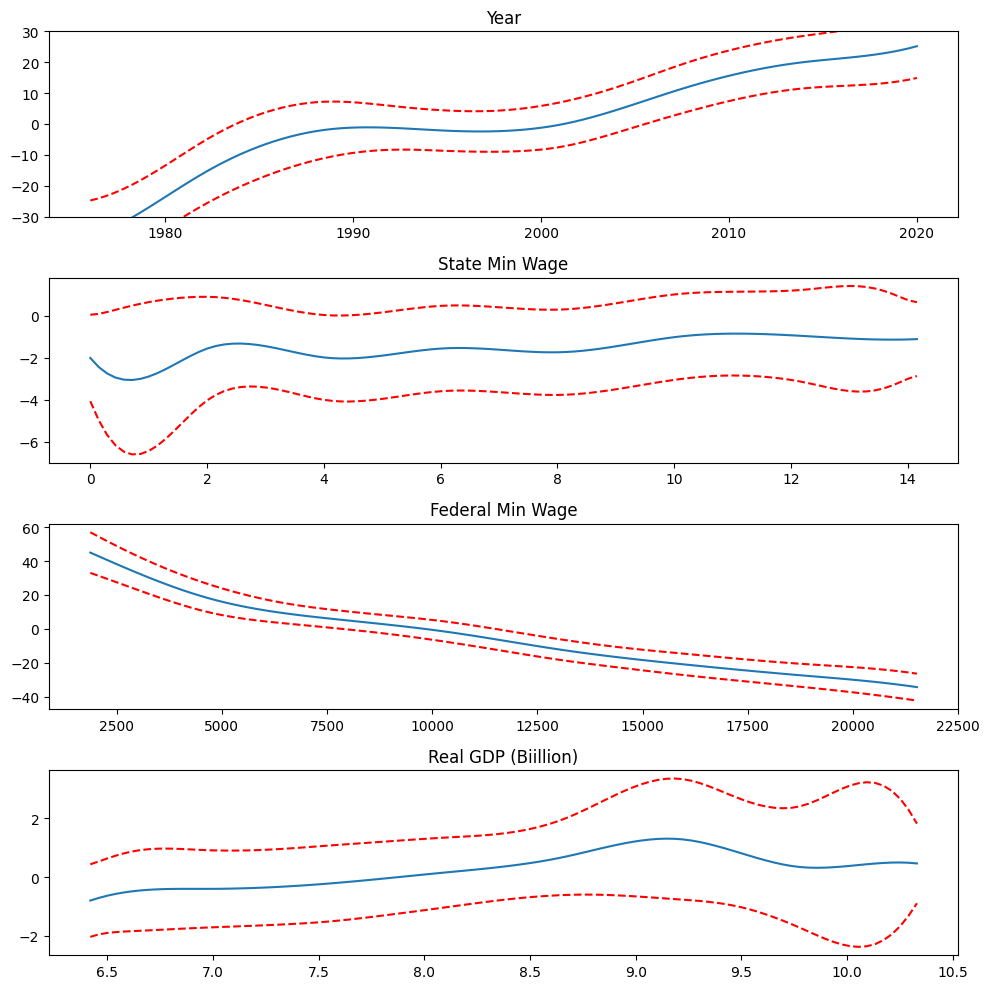

In [43]:
## plotting
fig, axs = plt.subplots(4,1,figsize=(10, 10));

titles = ['Year', 'State Min Wage',
       'Federal Min Wage', 'Real GDP (Biillion)','CPI Average',
       'Total Civilian Non-Institutional',
       'Total Civilian Labor Force']
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    if i == 0:
        ax.set_ylim(-30,30)
    ax.set_title(titles[i]);

plt.tight_layout() 
plt.show()